In [1]:
import sympy as sp
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import time
import RSA as rsa

In [2]:

def attack(n, e):
    # get the prime factorization of n
    start = time.time()

    factors = rsa.factorize_n(n)
    p = factors.popitem()[0]
    q = factors.popitem()[0]
    phi = (p - 1) * (q - 1)
    d = rsa.multiplicative_inverse(e, phi)

    end = time.time()
    total_time = end - start

    return d, total_time


# unused function
def attack_manually(n, e):
    start = time.time()

    p = 0
    q = 0
    for i in range (3, int(np.ceil(np.sqrt(n)))):
        if (n % i == 0):
            p = i
            q = n // p
            break

    phi = (p - 1) * (q - 1)
    d = rsa.multiplicative_inverse(e, phi)

    end = time.time()
    total_time = end - start

    return d, total_time




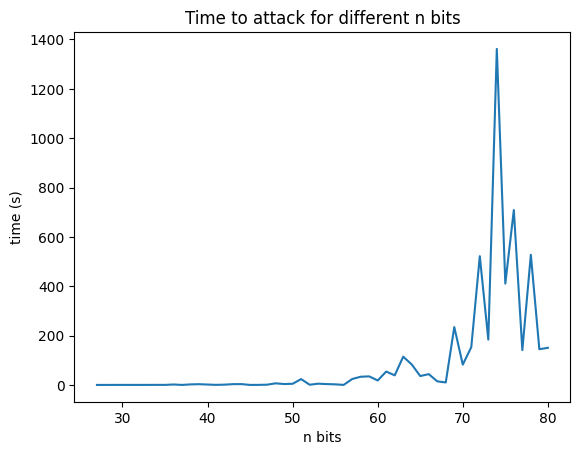

In [5]:
def attack_diff_n_bits():
    rsa.generate_pq_for_n_bits(False)
    # if the file already exists, delete it
    try:
        os.remove("time_bit.txt")
    except OSError:
        pass
    with open("n_e_d.txt", "r") as f:
        lines = f.readlines()
        for line in lines:
            n = int(line.split(" ")[1])
            e = int(line.split(" ")[3])
            bit = int(line.split(" ")[7])
            d_original = int(line.split(" ")[5])
            d, total_time = attack(n, e)
            
            # compare the original d with the one we got from the attack
            if(d_original == d):
                # store the time and the bit in a file to compare the time it takes to attack for different n
                with open("time_bit.txt", "a") as f:
                    f.write("bit: " + str(bit) + " time: " + str(total_time) + "\n")

            else:
                print("The attack was not successful")
        rsa.plot_to_analyze("time_bit.txt", "Time to attack for different n bits", "s")
            #print("n: " + str(n) + " e: " + str(e) + " d: " + str(d) + " bit: " + str(bit) + " time: " + str(total_time))

# calling of the functions
attack_diff_n_bits()